**Importing the Libraries**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

1. **DATA ACQUISITION**

In [3]:
#reading the dataset into the code
heart_data = pd.read_csv("/content/heart_disease_data.csv")

1.1 Scanning the data

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
heart_data.shape

(303, 14)

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#basic description of the dataset
pd.set_option('display.float_format',lambda x: '%.3f' % x)
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


**2. DATA FILTERING**

2.1 Removing non usefull columns from the dataset

In [12]:
#how to remove non usefull columns from the dataset
#heart_data = heart_data.drop(['column name', 'another column name'], axis = 1)

2.2 Finding missing values

In [9]:
#how to find missing values
heart_data.isnull().sum()
#how to find the percentage of missingness in each column
#heart_data.isnull().mean()*100

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


2.3 Dealing with missing values

In [16]:
#how to replace missing values with the mean of the column
#heart_data['column name'] = heart_data['column name'].fillna(heart_data['column name'].mean())
#droping rows with >10% missingness
#heart_data = heart_data.dropna(thresh = heart_data.shape[0]*0.9, how = 'all', axis = 0)
#check for the missing values to see results

2.4 Checking for duplicates

In [10]:
heart_data.duplicated().sum()

1

In [11]:
#how to remove duplicated values
heart_data = heart_data.drop_duplicates()

In [12]:
heart_data.duplicated().sum()

0

**3. DATA TRANSFORMATION**

3.1 Transforming text into integers

In [20]:
#used for transforming categorical data into numerical data
#heart_data['column name'].unique() #checks the categories its grouped as
#heart_data['column name'].value_counts(normalize = True) #checks the number of each category (in percentage)

3.2 Coverting the date text to pandas dataframe

In [ ]:
#heart_data['column name'] = pd.to_datetime(heart_data['column name'])

**4. DATA EXPLORATION ANALYSIS / EXPLORATORY DATA ANALYSIS**

4.1 Target variable

In [13]:
heart_data['target'].value_counts(normalize=True)

,proportion
target,
1,0.543
0,0.457


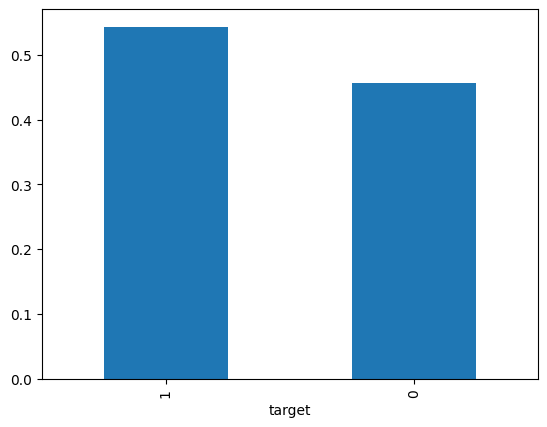

In [14]:
heart_data['target'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [15]:
#shows correlation between the two selected groups
heart_data.groupby('sex')['target'].mean()

,target
sex,
0,0.750
1,0.447


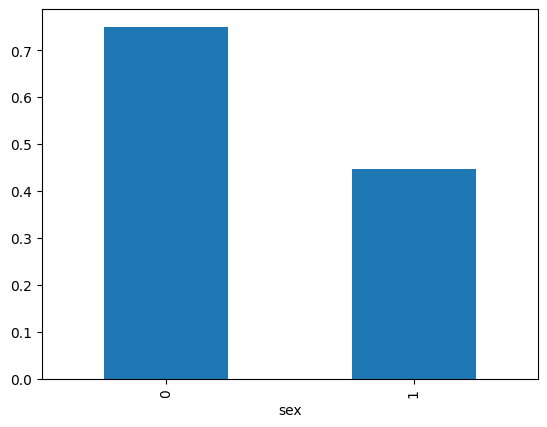

In [19]:
heart_data.groupby('sex')['target'].mean().plot(kind='bar')
plt.show()

Splitting the Features and Target

In [22]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [23]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0    2.300   
1     37    1   2       130   250    0        1      187      0    3.500   
2     41    0   1       130   204    0        0      172      0    1.400   
3     56    1   1       120   236    0        1      178      0    0.800   
4     57    0   0       120   354    0        1      163      1    0.600   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1    0.200   
299   45    1   3       110   264    0        1      132      0    1.200   
300   68    1   0       144   193    1        1      141      0    3.400   
301   57    1   0       130   131    0        1      115      1    1.200   
302   57    0   1       130   236    0        0      174      0    0.000   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [24]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64


Splitting the Data into Training data & Test Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [28]:
print(X.shape, X_train.shape, X_test.shape)

(302, 13) (241, 13) (61, 13)


**MODEL TRAINING**

Logistic Regression

In [29]:
model = LogisticRegression()

In [30]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [33]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
print('Accuracy on Training data : ', training_data_accuracy*100)

Accuracy on Training data :  85.06224066390041


In [36]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print('Accuracy on Test data : ', test_data_accuracy*100)

Accuracy on Test data :  81.9672131147541


Building a Predictive System

In [39]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
